In [1]:
import sys
import os
import shutil
import librosa
import glob
import numpy as np
from librosa import display as ld
from IPython import display as ipd
from sklearn.preprocessing import StandardScaler
from sklearn.externals.joblib import load, dump

/Users/apple/miniconda3/envs/cta-dev/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
sys.path += ['../src/filecheck', '../src/preprocessing',]
from flatfielding import *
from filepath import *
from spectrogram import *

In [3]:
filename = '/Users/apple/Documents/soundofsilence/data/valve/id_00/abnormal/00000000.wav'
ipd.Audio(filename)

In [4]:
# Mel spectrogram parameters
n_mels = 64
# This is not the no. o frames in the x-axis
frames = 5
n_fft = 1024
hop_length = 512 
power = 2.0
window = 'hann'

In [5]:
dims = n_mels * frames
dims

320

In [6]:
y, sr = librosa.load(filename, sr=None, mono=True)

In [7]:
sr

16000

In [8]:
mel_spectro = librosa.feature.melspectrogram(y=y,
                                                 sr=sr,
                                                 n_fft=n_fft,
                                                 hop_length=hop_length,
                                                 n_mels=n_mels,
                                                 power=power, 
                                                 window=window)

In [9]:
mel_spectro.shape

(64, 313)

In [10]:
log_mel_spectrogram = 20.0 / power * np.log10(mel_spectro + sys.float_info.epsilon)

In [11]:
log_mel_spectrogram.shape

(64, 313)

In [12]:
vectorarray_size = len(log_mel_spectrogram[0, :]) - frames + 1
vectorarray_size

309

In [13]:
vectorarray = np.zeros((vectorarray_size, dims), float)
vectorarray.shape

(309, 320)

In [14]:
for t in range(frames):
    #print(n_mels * (t), n_mels * (t+1))
    #print((t), t + vectorarray_size)
    vectorarray[:, n_mels * t: n_mels * (t + 1)] = log_mel_spectrogram[:, t: t + vectorarray_size].T

In [15]:
vectorarray.shape

(309, 320)

In [16]:
64*5

320

# Create spectrograms

In [17]:
BASE = "/Users/apple/Documents/soundofsilence/data"
SR = 16000

In [18]:
filepath = extract_filepath(BASE, inst='valve', id='id_00', cond='abnormal', extradir='flatfield')
filepath

['/Users/apple/Documents/soundofsilence/data/valve/id_00/abnormal/flatfield/00000000.wav',
 '/Users/apple/Documents/soundofsilence/data/valve/id_00/abnormal/flatfield/00000001.wav',
 '/Users/apple/Documents/soundofsilence/data/valve/id_00/abnormal/flatfield/00000002.wav',
 '/Users/apple/Documents/soundofsilence/data/valve/id_00/abnormal/flatfield/00000003.wav',
 '/Users/apple/Documents/soundofsilence/data/valve/id_00/abnormal/flatfield/00000004.wav',
 '/Users/apple/Documents/soundofsilence/data/valve/id_00/abnormal/flatfield/00000005.wav',
 '/Users/apple/Documents/soundofsilence/data/valve/id_00/abnormal/flatfield/00000006.wav',
 '/Users/apple/Documents/soundofsilence/data/valve/id_00/abnormal/flatfield/00000007.wav',
 '/Users/apple/Documents/soundofsilence/data/valve/id_00/abnormal/flatfield/00000008.wav',
 '/Users/apple/Documents/soundofsilence/data/valve/id_00/abnormal/flatfield/00000009.wav',
 '/Users/apple/Documents/soundofsilence/data/valve/id_00/abnormal/flatfield/00000010.wav',

In [19]:
# Test read_audio
samp, soun = read_audio(filename)
soun

array([ 0.00451279,  0.00279236,  0.00391388, ...,  0.00117493,
       -0.00113678, -0.00219727], dtype=float32)

(64, 313)


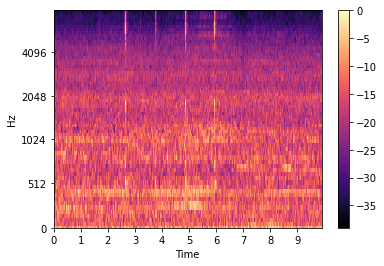

In [20]:
# test mel_spectrogram
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

log_mel = mel_spectrogram(filename).T
#log_mel = log_mel.T
print(log_mel.shape)

img = ld.specshow(log_mel[:, 0:309], 
                x_axis='time', 
                y_axis='mel', 
                sr=samp, 
                fmax=8000, 
                ax=ax)

fig.colorbar(img, ax=ax)

In [21]:
"""
def spectrogram_blocks(file, 
                       frames=5, 
                       n_fft=1024,
                       hop_length=512, 
                       n_mels=64, 
                       power=power, 
                       window='hann'):
    
    log_mel_spec = mel_spectrogram(file,
                                   n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels, 
                                   power=power, 
                                   window=window).T
    
    ndim = frames * n_mels
    
    sample_size_in_block = log_mel_spec.shape[1] - frames + 1
    
    if sample_size_in_block < 1:
        return np.empty((0, ndim), float)
    
    feature_array = np.zeros((sample_size_in_block, ndim), float)
    
    for i in range(frames):
        spec_sample = log_mel_spec[:, i : sample_size_in_block + i]
        feature_array[:, n_mels * i : n_mels * (i+1)] = spec_sample.T
        
    return feature_array
"""

"\ndef spectrogram_blocks(file, \n                       frames=5, \n                       n_fft=1024,\n                       hop_length=512, \n                       n_mels=64, \n                       power=power, \n                       window='hann'):\n    \n    log_mel_spec = mel_spectrogram(file,\n                                   n_fft=n_fft, \n                                   hop_length=hop_length, \n                                   n_mels=n_mels, \n                                   power=power, \n                                   window=window).T\n    \n    ndim = frames * n_mels\n    \n    sample_size_in_block = log_mel_spec.shape[1] - frames + 1\n    \n    if sample_size_in_block < 1:\n        return np.empty((0, ndim), float)\n    \n    feature_array = np.zeros((sample_size_in_block, ndim), float)\n    \n    for i in range(frames):\n        spec_sample = log_mel_spec[:, i : sample_size_in_block + i]\n        feature_array[:, n_mels * i : n_mels * (i+1)] = spec_sam

In [22]:
"""
# Test spectrogram block
fa = spectrogram_blocks(filename)
frames = 5
n_mels=64

fig, axs = plt.subplots(5, 1, figsize=(5,15))

for i in range(frames):
    spec_block = fa[:, i * n_mels : (i+1) * n_mels].T
    img = ld.specshow(spec_block, 
                    x_axis='time', 
                    y_axis='mel', 
                    sr=16000, 
                    fmax=8000, ax=axs[i])
    fig.colorbar(img, ax=axs[i])
"""

"\n# Test spectrogram block\nfa = spectrogram_blocks(filename)\nframes = 5\nn_mels=64\n\nfig, axs = plt.subplots(5, 1, figsize=(5,15))\n\nfor i in range(frames):\n    spec_block = fa[:, i * n_mels : (i+1) * n_mels].T\n    img = ld.specshow(spec_block, \n                    x_axis='time', \n                    y_axis='mel', \n                    sr=16000, \n                    fmax=8000, ax=axs[i])\n    fig.colorbar(img, ax=axs[i])\n"

Spectrogram= 0
Min= -3.7379519939422607
Max= 5.203478813171387
Mean= 2.0071693500641326
Std= 1.1450152929060995
################################
Spectrogram= 1
Min= -3.106252908706665
Max= 4.067971229553223
Mean= -0.20528298939744338
Std= 0.6528873317977547
################################
Spectrogram= 2
Min= -3.703984022140503
Max= 4.253470420837402
Mean= -0.5434275872695271
Std= 0.897209183366608
################################
Spectrogram= 3
Min= -2.3218889236450195
Max= 5.022548198699951
Mean= 1.9165954491346868
Std= 0.8905335612336464
################################
Spectrogram= 4
Min= -2.8535335063934326
Max= 4.591144561767578
Mean= 0.5767735347524292
Std= 0.6645266486716223
################################


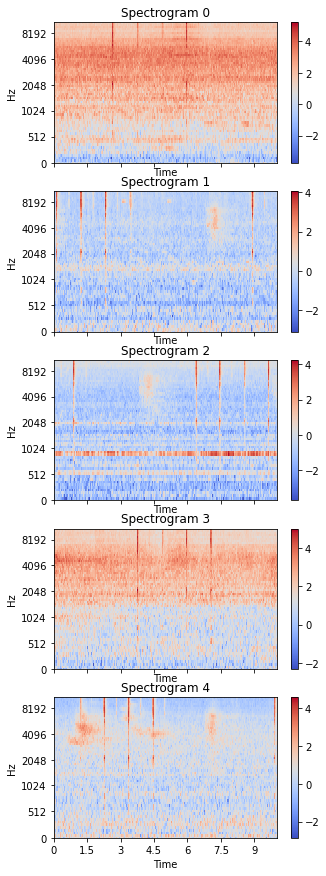

In [23]:
# Test mel_spectrogram_list

unscaled = mel_spectrogram_list(filepath, 
                         fit_scaler=False,
                         scale_dir='/scaler',
                         out_dir='/specdata',
                         n_fft=1024,
                         hop_length=512,
                         n_mels=64,
                         power=2,
                         window='hann')

fig, axs = plt.subplots(5, 1, figsize=(5,15), sharex=True)

for i in range(len(unscaled[:5])):
    spec_block = unscaled[i,].T
    print("Spectrogram=", i)
    print("Min=", spec_block.flatten().min())
    print("Max=", spec_block.flatten().max())
    print("Mean=", spec_block.flatten().mean())
    print("Std=", spec_block.flatten().std())
    # Plot
    axs[i].set(title="Spectrogram {}".format(i))
    img = ld.specshow(spec_block, 
                    x_axis='time', 
                    y_axis='mel', 
                    sr=16000, 
                    fmax=None, ax=axs[i])
    fig.colorbar(img, ax=axs[i])
    print("################################")

Spectrogram= 0
Min= -3.7379519939422607
Max= 5.203478813171387
Mean= 2.0071693500641326
Std= 1.1450152929060995
################################
Spectrogram= 1
Min= -3.106252908706665
Max= 4.067971229553223
Mean= -0.20528298939744338
Std= 0.6528873317977547
################################
Spectrogram= 2
Min= -3.703984022140503
Max= 4.253470420837402
Mean= -0.5434275872695271
Std= 0.897209183366608
################################
Spectrogram= 3
Min= -2.3218889236450195
Max= 5.022548198699951
Mean= 1.9165954491346868
Std= 0.8905335612336464
################################
Spectrogram= 4
Min= -2.8535335063934326
Max= 4.591144561767578
Mean= 0.5767735347524292
Std= 0.6645266486716223
################################


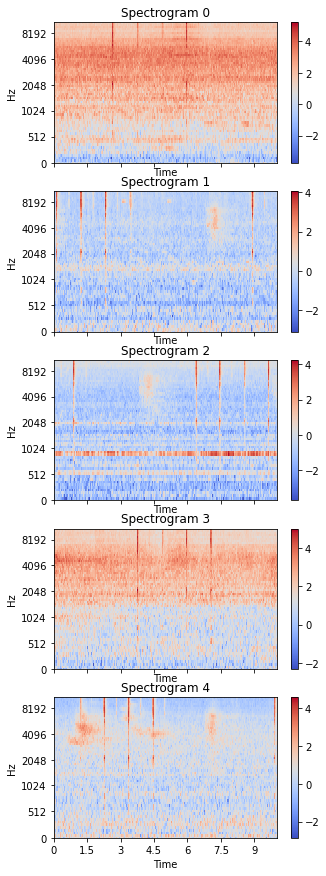

In [24]:
# Test read_features

X = read_features(filepath)

fig, axs = plt.subplots(5, 1, figsize=(5,15), sharex=True)

for i in range(len(X[:5])):
    spec_block = X[i,].T
    print("Spectrogram=", i)
    print("Min=", spec_block.flatten().min())
    print("Max=", spec_block.flatten().max())
    print("Mean=", spec_block.flatten().mean())
    print("Std=", spec_block.flatten().std())
    # Plot
    axs[i].set(title="Spectrogram {}".format(i))
    img = ld.specshow(spec_block, 
                    x_axis='time', 
                    y_axis='mel', 
                    sr=16000, 
                    fmax=None, ax=axs[i])
    fig.colorbar(img, ax=axs[i])
    print("################################")